## Here I'm doing the image denoising using Convolutional Neural Network
1. I have used MNIST dataset.
2. We can use any of the dataset instead of MNIST such as : fashion_mnist or any other custom data.
3. I've used Auto encoder Convolutional Neural Network to train the dataset.
4. At last, calculating the PSNR value between noise data snd denoised data.

## Importing required libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
tf.__version__

'2.3.0'

## Load MNIST dataset

In [2]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

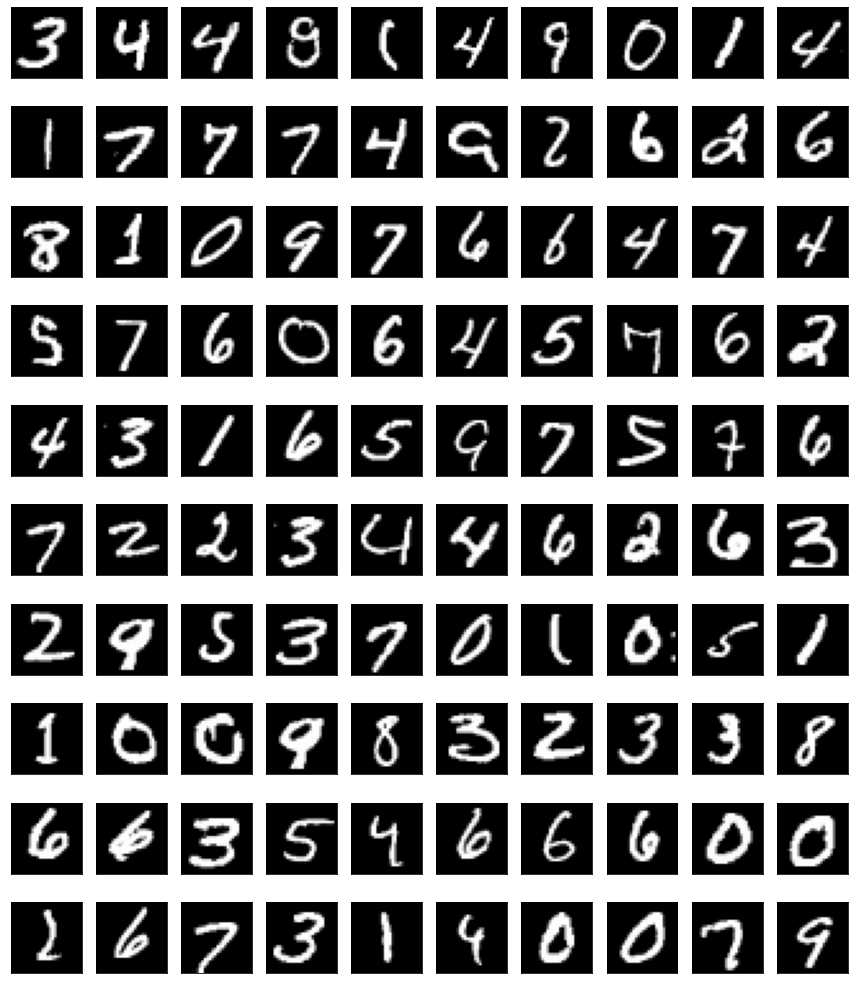

In [4]:
a=np.random.randint(low=0,high=1000,size=100)
fig=plt.figure(figsize=(15,18))
c=1
for i in a:
    fig.add_subplot(10,10,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='gray')
    #plt.title(labels[y_train[i]],color="green",fontsize=12)
    c+=1

In [5]:
x_train=x_train/255.
x_test=x_test/255.

## Adding noise to training images 

In [6]:
noise_factor=0.5
noise_train=[]

for img in x_train:
    noisy_img = img + noise_factor* np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img , 0, 1)
    noise_train.append(noisy_img)

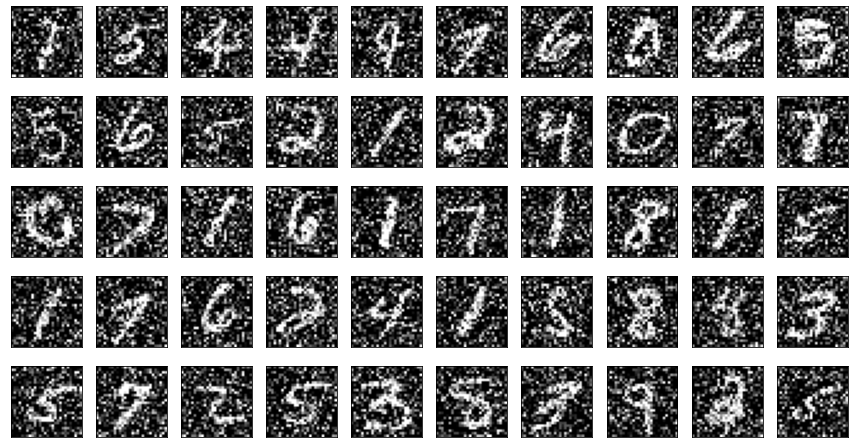

In [7]:
a=np.random.randint(low=0,high=1000,size=50)
fig=plt.figure(figsize=(15,8))
c=1
for i in a:
    fig.add_subplot(5,10,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(noise_train[i],cmap='gray')
    #plt.title(labels[y_train[i]],color="green",fontsize=12)
    c+=1

## Adding noise to test images

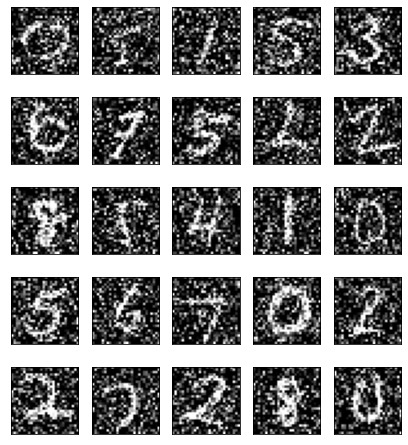

In [8]:
noise_factor=0.5
noise_test=[]

for img in x_test:
    noisy_img = img + noise_factor* np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img , 0, 1)
    noise_test.append(noisy_img)

a=np.random.randint(low=0,high=1000,size=25)
fig=plt.figure(figsize=(7,8))
c=1
for i in a:
    fig.add_subplot(5,5,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(noise_test[i],cmap='gray')
    #plt.title(labels[y_test[i]],color="green",fontsize=12)
    c+=1

In [9]:
noise_test=np.array(noise_test)
noise_train=np.array(noise_train)

In [10]:
noise_train.shape

(60000, 28, 28)

## Auto Encoder model using Convolutional Neural Network

In [11]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=2,padding='same',input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.Conv2D(16,(3,3),strides=2,padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(16,(3,3),strides=1,padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(32,(3,3),strides=2,padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(1,(3,3),strides=2,padding='same',activation='sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 16)          2320      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 12,193
Trainable params: 12,193
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [13]:
valid_noise=noise_test[:5000,:]
valid_y=x_test[:5000,:]
noise_test = noise_test[5000:,:]
x_test = x_test[5000:,:]
print(valid_noise.shape,valid_y.shape,noise_test.shape,x_test.shape)

(5000, 28, 28) (5000, 28, 28) (5000, 28, 28) (5000, 28, 28)


In [14]:
model.fit(noise_train.reshape(-1,28,28,1),
               x_train.reshape(-1,28,28,1),
               epochs=10,
               batch_size=32,
               validation_data=(valid_noise.reshape(-1,28,28,1),valid_y.reshape(-1,28,28,1)))

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1389 - accuracy: 0.8101 - val_loss: 0.1094 - val_accuracy: 0.8214
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1064 - accuracy: 0.8123 - val_loss: 0.1034 - val_accuracy: 0.8216
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1032 - accuracy: 0.8127 - val_loss: 0.1011 - val_accuracy: 0.8215
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1017 - accuracy: 0.8129 - val_loss: 0.1001 - val_accuracy: 0.8215
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1008 - accuracy: 0.8130 - val_loss: 0.0999 - val_accuracy: 0.8212
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1003 - accuracy: 0.8130 - val_loss: 0.0992 - val_accuracy: 0.8213
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0998 - accuracy: 0.8131 - val_loss: 0.0988 -

## Model Evaluation

In [15]:
metric = model.evaluate(noise_test.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1))

157/157 [==============================] - 1s 7ms/step - loss: 0.0983 - accuracy: 0.8026


In [16]:
print("Test Accuracy is {:.2f} and loss is {:.3f}".format(metric[1]*100,metric[0]))

Test Accuracy is 80.26 and loss is 0.098


## Printing noised data

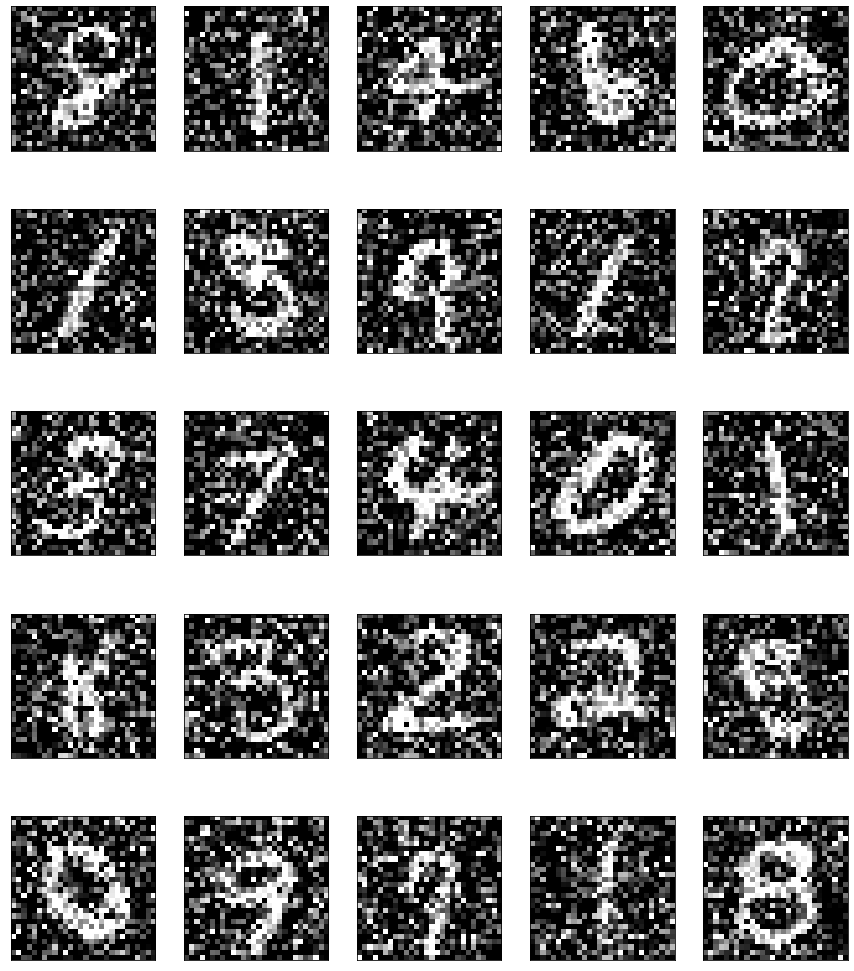

In [96]:
a=np.random.randint(low=0,high=1000,size=25)
fig=plt.figure(figsize=(15,18))
c=1
for i in a:
    fig.add_subplot(5,5,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(noise_test[i].reshape(28,28),cmap='gray')
    #plt.title(labels[y_test[5000:][i]],color="green",fontsize=12)
    c+=1
    plt.savefig('noise1.png')

## Printing the Denoised Images from Model (Model Output)

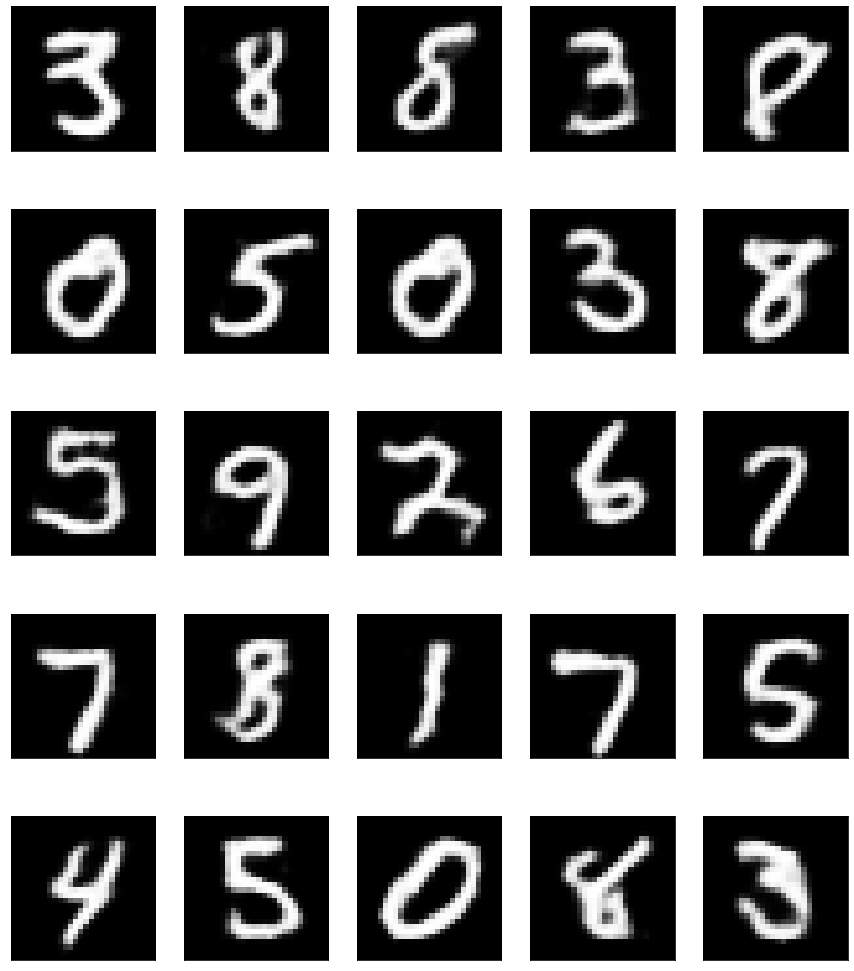

In [98]:
a=np.random.randint(low=0,high=1000,size=25)
fig=plt.figure(figsize=(15,18))
c=1
for i in a:
    pred=autoencoder.predict(noise_test[i].reshape(1,28,28,1))
    fig.add_subplot(5,5,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(pred.reshape(28,28),cmap='gray')
    #plt.title(labels[y_test[5000:][i]],color="green",fontsize=12)
    c+=1
    plt.savefig('denoise1.png')

## Printing the Original Images (Denoised)

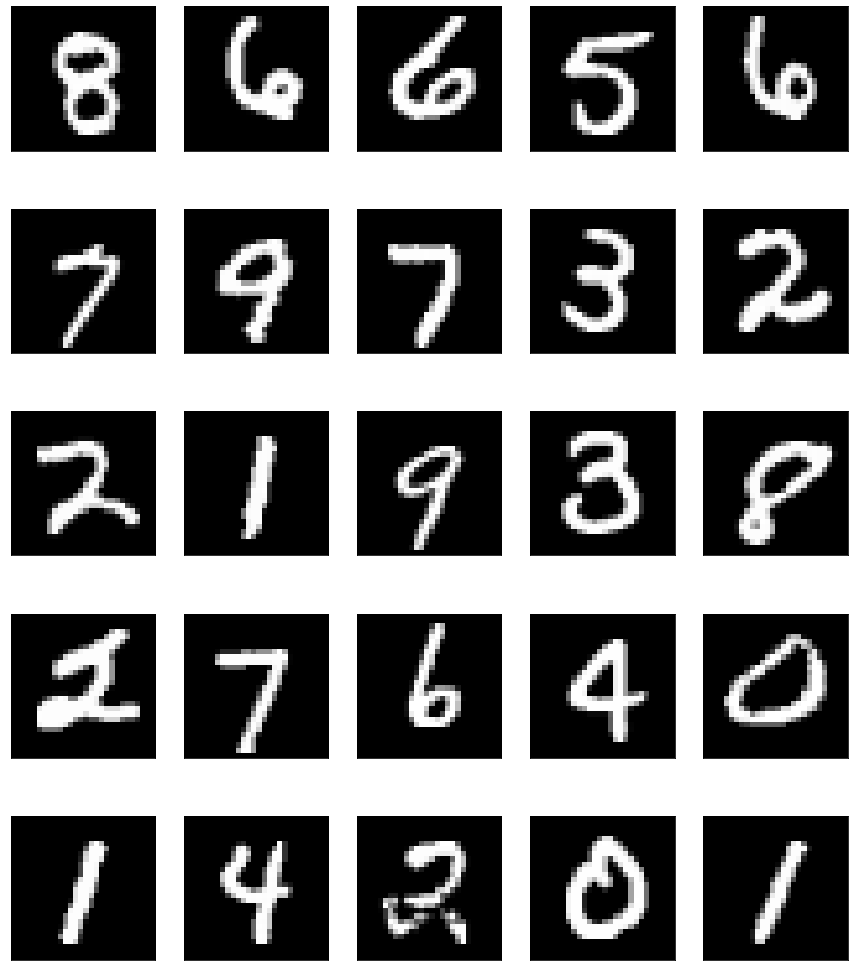

In [93]:
fig=plt.figure(figsize=(15,18))
c=1
for i in a:
    fig.add_subplot(5,5,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    #plt.title(labels[y_test[5000:][i]],color="green",fontsize=12)
    c+=1
    plt.savefig('Original1.png')

In [99]:
from math import log10, sqrt
import cv2
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     original = cv2.imread("noise1.png")
     compressed = cv2.imread("denoise1.png", 1)
     value = PSNR(original, compressed)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 34.34993449699764 dB
